In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The dataset that would be used in the notebook contains 5 features or columns, viz. 'Age', 'Annual Income', 'Spending Score' and 'Gender'. The data seems to be gathered for regular customers in a mall and based on their spending, the customers are assigned a Spending Score.

Our objective is to segment the customers so that targetted marketing can be implemented on the customers. For instance, different categories of customers can be provided with category specific offers, thus leading to increased revenue and profits for the mall stores.

One might ask in how many categories should we segregate the customers, most of time one can infer it from the domain specific knowledge.

We will see further that there is a way to find a somewhat reasonable estimate for the number of clusters, however there is no correct answer for this number.

First let us explore the dataset

In [2]:
dp=pd.read_csv('Mall_Customers.csv')

In [3]:
dp

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dp.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

As we can see there is no missing data in the dataset.

Let us drop the customer ID column from the dataset since it would be of no use while clustering.

In [5]:
dp = dp.drop('CustomerID', axis=1)

There are three variables in the dataset, so let us plot scatter plots between the combinations of these three variables.

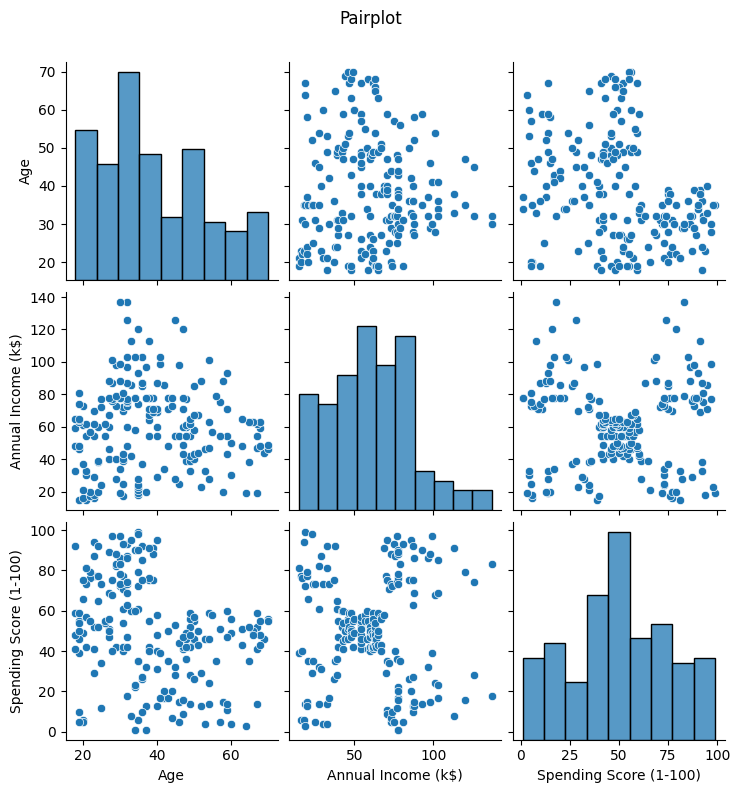

In [6]:
sns.pairplot(dp);
plt.suptitle('Pairplot', y=1.05);

The plot between the Spending score and the Annual income looks interesting, let us try to zoom it.

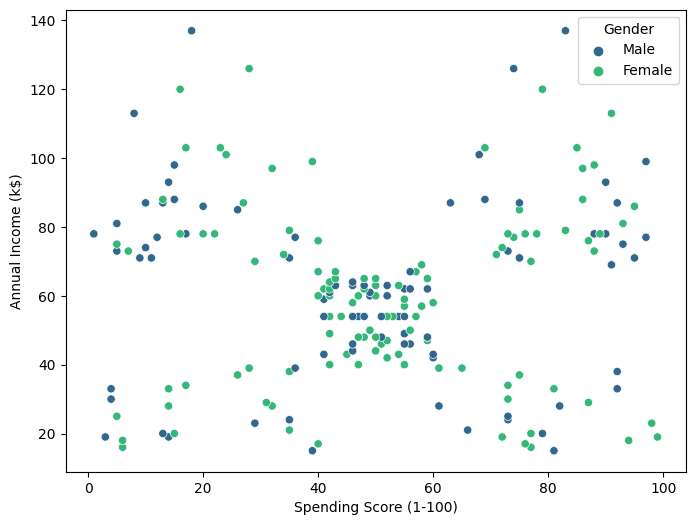

In [7]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=dp, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', palette='viridis');

If we try to look carefully we can already visualize some clusters in our dataset, Moreover we cannot draw any obvious inference from the gender.

In [8]:
dp.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


We can see that women on average spend slightly more than men

Let us first convert the categorical feature 'gender' into a binary variable.

In [9]:
dp = pd.get_dummies(dp, drop_first=True)

In [10]:
dp

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


Since the clusturing algorithms use distance as a metric to create categories, we need to scale the data.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_dp = scaler.fit_transform(dp)

Now let us start with the K-Means algorithm.

We will use the sklearn library for this.

In [13]:
from sklearn.cluster import KMeans

To see what k value is good for the data, we will use the 'elbow method' by plotting a graph between sum of squared distances and k value.

So let us now check which k would be best, with max value of k being 10, as discussed above this max value is just a reasonable guess, although a very high value of k would be not be very insigtful and we will also overfit the dataset.

In [14]:
sum_of_squared_distances = [] 

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_dp)
    sum_of_squared_distances.append(model.inertia_)

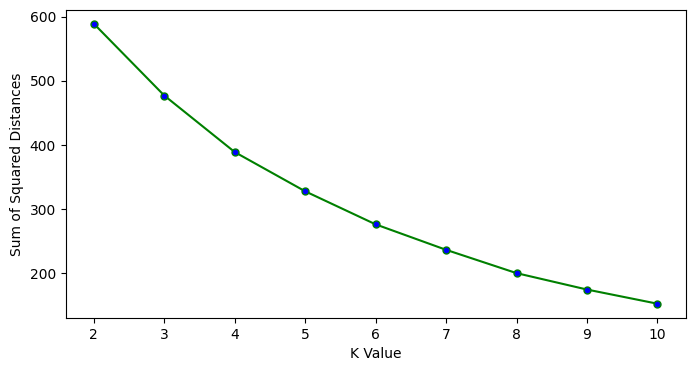

In [15]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), sum_of_squared_distances, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");

Looking at the graph the elbow seems to be near 5, although the elbow point isn't very clear.

So now let us create a model with 5 clusters.

In [16]:
model = KMeans(n_clusters=5)
model.fit(scaled_dp)

KMeans(n_clusters=5)

So this has labeled every point in the dataset with a interger ranging from 0 to 4.

In [17]:
k_means_labels = model.fit_predict(scaled_dp)
k_means_labels

array([0, 0, 2, 3, 3, 3, 2, 3, 1, 3, 1, 3, 2, 3, 1, 0, 2, 0, 1, 3, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 3, 1, 3, 1, 0, 2, 3, 2, 3, 2, 3, 2, 0, 1, 3,
       2, 3, 2, 3, 3, 3, 2, 0, 3, 1, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 3, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 1, 0, 1, 2, 3, 1, 2, 3,
       3, 2, 2, 0, 1, 2, 3, 0, 2, 3, 1, 0, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1,
       1, 3, 2, 0, 3, 3, 2, 2, 2, 2, 0, 2, 3, 0, 3, 3, 4, 0, 1, 0, 4, 0,
       3, 3, 4, 3, 2, 0, 4, 3, 2, 0, 3, 3, 4, 0, 4, 3, 2, 0, 4, 0, 2, 3,
       2, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 2, 0, 4, 0, 4, 0, 2, 3,
       4, 0, 4, 0, 2, 3, 4, 3, 2, 0, 2, 0, 2, 3, 2, 3, 4, 3, 2, 3, 2, 0,
       4, 0], dtype=int32)

Now lets try to visualize the clustering, since we have in total 4 features here so what we will do is plot a 3-D plot and segregate the gender based on the shapes of the points, namely circle and the diamond.

In [20]:
import plotly.express as px
fig = px.scatter_3d(dp, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(dp), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
fig.show()

It's very easy to visualize the clusters in the above interactive plot.

Now let us try Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering


In [34]:
model = AgglomerativeClustering(n_clusters=5)

In [36]:
model.fit_predict(dp) # predict the categories for each point.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [38]:
import plotly.express as px
fig = px.scatter_3d(dp, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(dp), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
fig.show()

As we can see that the Heirarchical clustering also performs well, the points seem to be well seperated.

Now let us try the final algorithm, which is the DBSCAN.

In [39]:
from sklearn.cluster import DBSCAN


In DBSCAN, there are 2 main parameters that can be adjusted, 'epsilon' (eps) and 'min_samples'.

A good 'min_samples' number is two times the number of features (columns). We have 4 features so 'min_samples' value will be 8.

To get a reasonable value for epsilon, we will again use the 'elbow method' between % of outlier points and epsilon.

DBSCAN marks points that it thinks are outliers as being in a separate cluster labelled as '-1'.

In [40]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(scaled_dp)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

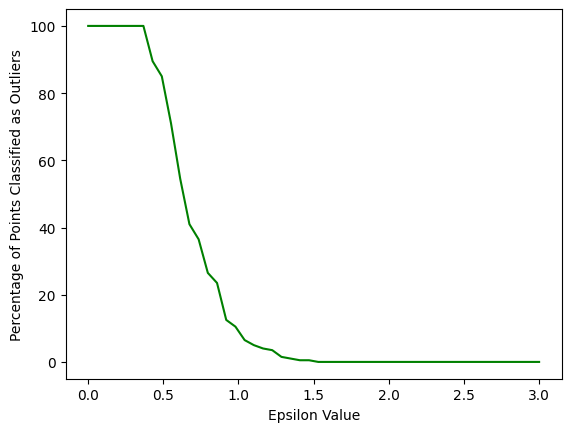

In [41]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' forms somewhere around epsilon = 1.2.
Let's create a model wil epsilon value 1.2 and minimum number of samples 8.

In [42]:
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(scaled_dp)

DBSCAN(eps=1.2, min_samples=8)

In [44]:
import plotly.express as px
fig = px.scatter_3d(dp, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=dbscan.labels_, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))

The DBSCAN does not prerform as well as the K-means and heirarchical clustering.